# 07-TEST_Library_characterization

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_TEST_LibraryCharacterisation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [774]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [124]:
%%capture
!pip install xlrd
!pip install --upgrade xlrd
!pip install ConStrain

In [775]:
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


Lets start by taking a look at the promoters that we have chosen

#### Promoter dynamics

In [1052]:
promoters_df = pd.read_csv('ConStrain_on_google_colab/Data/raw/promoters.csv')
promoters_df

,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [1053]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [1054]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [1055]:
promoters_df = promoters_df.set_index('name')

Lets divide the promoters into to two groups and plot the dynamics

In [1058]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [1059]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


Text(0.5, 0, 'Sampling time')

<Figure size 1080x576 with 0 Axes>

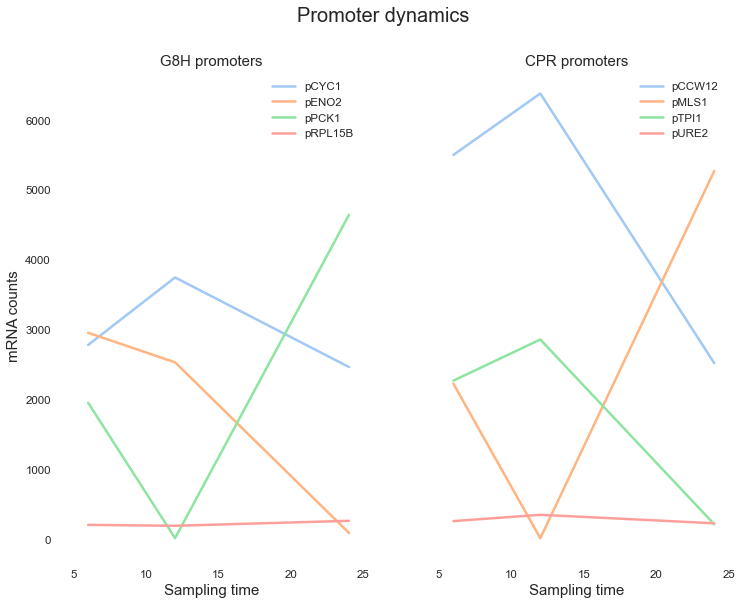

In [1060]:
# Plotting an empty subplot

import seaborn as sns
#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2.5})
sns.despine(bottom = True, left = True)

# Plotting an empty subplot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,9), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# removes the borders around the plot
sns.despine(bottom = True, left = True)
ax1.legend(frameon=False) # around the legend
ax2.legend(frameon=False) # around the legend


# changing the range of the x axis
ax1.set_xlim(4,25)
ax2.set_xlim(4,25)

# Adding all the titles
ax1.set_title("G8H promoters",  fontsize=15)
ax2.set_title("CPR promoters",  fontsize=15)
fig.suptitle("Promoter dynamics", fontsize=20)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling time", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling time", fontsize=15)

# saving the figure
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

# 1. DATA wrangling

In this section the objective is to: 
    
    1. Import data from LC-MS analysis
    2. Merge that data with information on the plate setup and enzyme homologs (i.e. what each well has produced)
    3. Import sequencing data - filter it
    4. Genotype the different wells with which promoters was used
    5. Merge all the data so we end up with the following for each well analysed: 
        - Normalized production of strictosidine
        - Homolog combination 
        - Promoter combination 

With this information we can go to the next step which is the ML step. 

- First lets import the lcms data. 

## 1.1 YP48 feeding experiment

In [783]:
import pandas as pd
import os

results1 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [784]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [785]:
# already did this
#df_filter.to_csv('../data/raw/023_LC-MS/all_results_lcms/Result_table_210330_tmet494_Lucas.csv')

In [786]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [787]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

Adding media rows to the AC_sample column

In [788]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## 1.2 Merge Plate design yp48-52 metadata into single csv file


In [789]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [790]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [791]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [792]:
results_merged.to_csv('ConStrain_on_google_colab/Data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [793]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [794]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [795]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [796]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [797]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])
len(final_processed_data)

108

## 1.3 Results YP48 (Cro strains)

**Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding.**

We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when fed.

1. YP48: Media feed: YP + 2 % glucose 2. YP + 2 % glucose + feed
2. YP49: Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

**Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak**


In [798]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_43343/694296229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


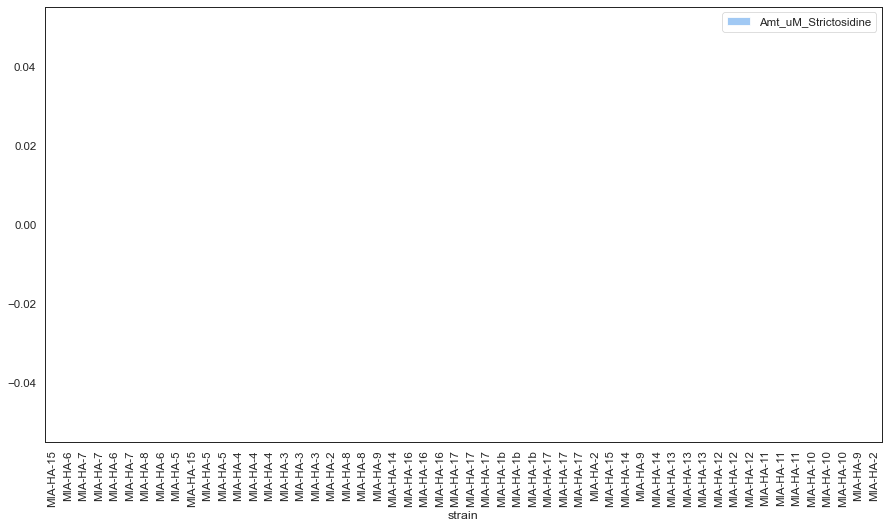

In [799]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
None

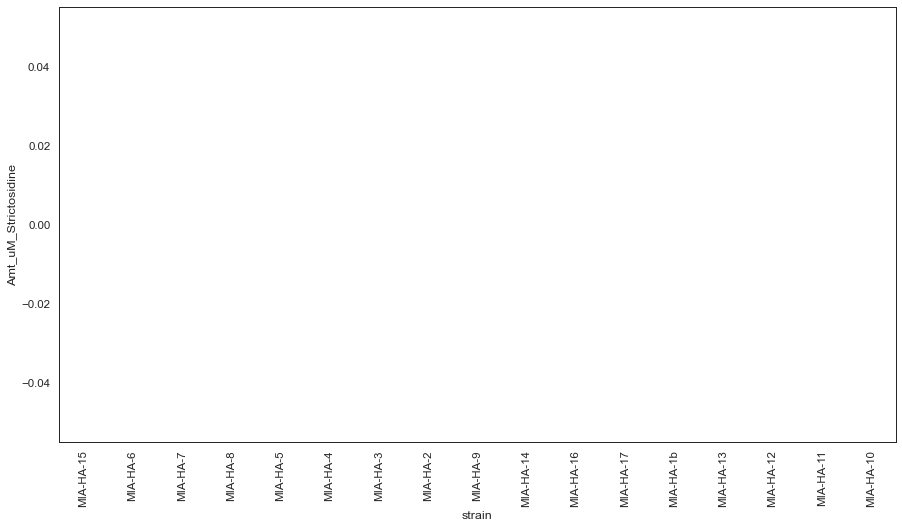

In [800]:
histogram = sns.barplot(data=yp48, x = 'strain', y = 'Amt_uM_Strictosidine')
#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

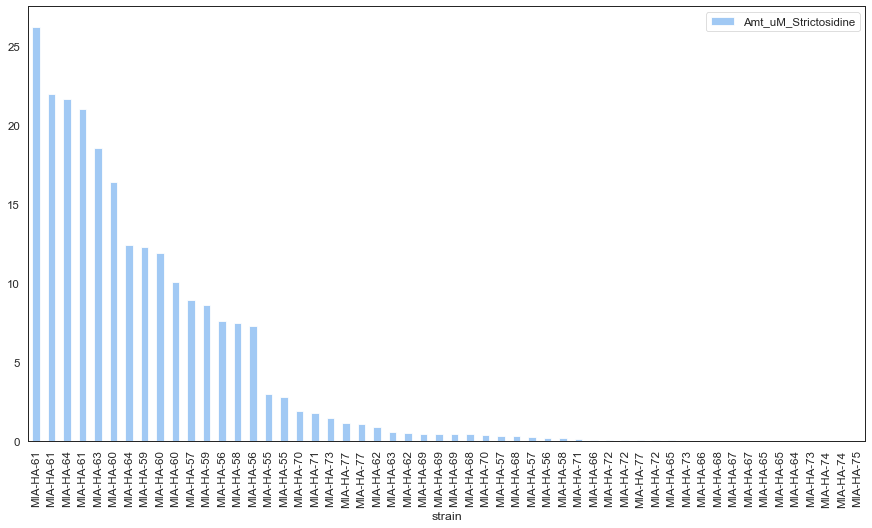

In [801]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
#yp49.head(50)
None

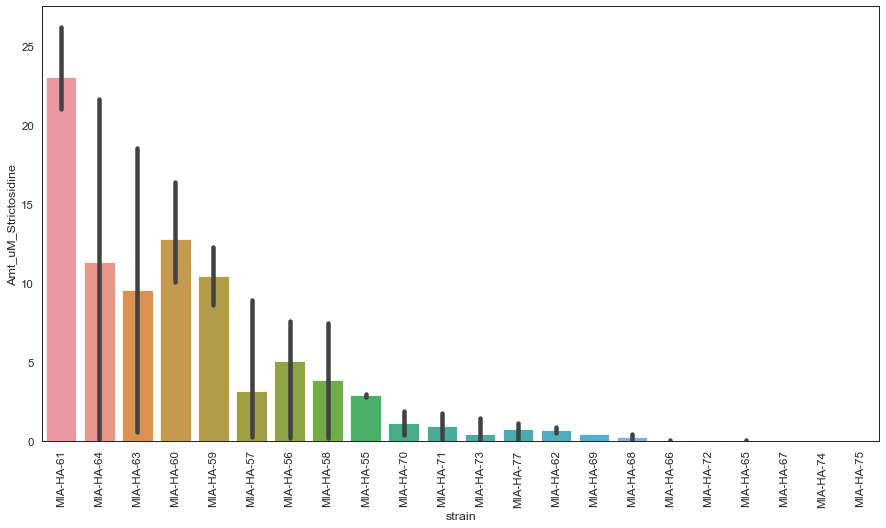

In [802]:
histogram = sns.barplot(data=yp49, x = 'strain', y = 'Amt_uM_Strictosidine')
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

## 1.4 Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

# 2. YP49-51 (library strains)

**Experiment:**

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

**Analytics notes:**

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [881]:
# Lets read in all the plates
plate49 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210603_tmet525_yp51.csv", sep = ',')
rerun = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210608_tmet525_reyp50-51.csv", sep = ',')
plate52 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210621_tmet531_soren.csv", sep = ',')

# rerun has two columns that are controls that we dont need
rerun = rerun.iloc[2:]

# Stack the DataFrames on top of each other - Lets add the plate 49 from before
results2 = pd.concat([ plate49,plate50, plate51 , rerun], axis=0)

In [947]:
plate50.head(20)

,data_file,sample_notes,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Unnamed: 7,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210603_TMET525_018.xms,96WPYP50_A1,NaN,NaN,NaN,54.684,173479.531,NaN,NaN,NaN,NaN,0.103067,1082.758276
1,210603_TMET525_019.xms,96WPYP50_A2,NaN,NaN,NaN,1713.696,252129.906,NaN,NaN,NaN,NaN,3.229915,1573.648146
2,210603_TMET525_020.xms,96WPYP50_A3,NaN,NaN,NaN,198.459,310779.063,NaN,NaN,NaN,NaN,0.374049,1939.702053
3,210603_TMET525_021.xms,96WPYP50_A4,NaN,NaN,NaN,NaN,193592.531,NaN,NaN,NaN,NaN,NaN,1208.291917
4,210603_TMET525_022.xms,96WPYP50_A5,NaN,NaN,NaN,336.890,172544.281,NaN,NaN,NaN,NaN,0.634959,1076.920990
5,210603_TMET525_023.xms,96WPYP50_A6,NaN,NaN,NaN,306.830,250514.922,NaN,NaN,NaN,NaN,0.578303,1563.568356
6,210603_TMET525_024.xms,96WPYP50_A7,NaN,NaN,NaN,1682.919,271268.063,NaN,NaN,NaN,NaN,3.171908,1693.097385
7,210603_TMET525_025.xms,96WPYP50_A8,NaN,1028.241,NaN,15218.933,207400.891,NaN,NaN,2.633949,NaN,28.684119,1294.475665
8,210603_TMET525_026.xms,96WPYP50_A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,210603_TMET525_027.xms,96WPYP50_A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 We filter for rows that has at least one of these compounds: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'

In [883]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

#df_filter_plates 
concatenated = concatenated.fillna(0)

In [1046]:
pd.set_option('display.max_rows', 1000)

concatenated


,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06
6,210519_TMET517_024.xms,96WP1056_A07,0.0,0.000000,0.0,0.273532,756.565728,96WP1056,A07
7,210519_TMET517_025.xms,96WP1056_A08,0.0,0.000000,0.0,0.062367,631.270722,96WP1056,A08
8,210519_TMET517_026.xms,96WP1056_A09,0.0,0.000000,0.0,0.000000,691.261041,96WP1056,A09
9,210519_TMET517_027.xms,96WP1056_A10,0.0,0.000000,0.0,0.000000,1216.886157,96WP1056,A10
10,210519_TMET517_028.xms,96WP1056_A11,0.0,0.000000,0.0,0.000000,680.061253,96WP1056,A11


In [956]:
## fixing the data - ADDING A zero between A1 --> A01
#for index, row in concatenated.iterrows():
#    if len(row['well']) == 2: 
#        letter, number = row['well'][0:1], row['well'][1:2]
#        print(letter, number)
#        row['well'] = str(letter) + '0' + str(number)
#        print(row['well'])


In [957]:
# copying sample to plate
results_copy = concatenated.copy()
results_copy['plate'] = results_copy['sample']
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,96WP1056
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,96WP1056
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,96WP1056
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,96WP1056
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,96WP1056
...,...,...,...,...,...,...,...,...,...,...
22,210608_TMET525_168.xms,96WPYP51_B7,0.0,0.0,0.0,0.000000,1088.967513,96WPYP51,B7,96WPYP51
24,210608_TMET525_171.xms,96WPYP51_B10,0.0,0.0,0.0,0.000000,924.953289,96WPYP51,B10,96WPYP51
25,210608_TMET525_183.xms,96WPYP51_C9,0.0,0.0,0.0,1.198360,955.882830,96WPYP51,C9,96WPYP51
26,210608_TMET525_190.xms,96WPYP51_D3,0.0,0.0,0.0,0.820546,1203.266115,96WPYP51,D3,96WPYP51


In [958]:
bool_series = results_copy.duplicated()
bool_series

0     False
1     False
3     False
4     False
5     False
      ...  
22    False
24    False
25    False
26    False
27    False
Length: 253, dtype: bool

In [959]:
yp49 = yp49[['data_file','sample_notes','Amt_uM_Loganic acid',
             'Amt_uM_Loganin','Amt_uM_Secologanin','Amt_uM_Strictosidine',
             'Amt_uM_Tryptamine','sample','well','plate']]
print(len(yp49))
yp49


54


,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
69,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,96WP989,C07,yp49
70,210330_TMET494_182.xms,96WP989_P2_C8,0.0,3.72660997,0.0,22.001720,663.9293846,96WP989,C08,yp49
77,210330_TMET494_192.xms,96WP989_P2_D5,0.0,3.676697064,0.0,21.646608,544.414761,96WP989,D05,yp49
71,210330_TMET494_183.xms,96WP989_P2_C9,0.0,3.294851171,0.0,21.050240,342.8212957,96WP989,C09,yp49
75,210330_TMET494_190.xms,96WP989_P2_D3,0.0,2.52681746,0.0,18.588539,520.9128948,96WP989,D03,yp49
...,...,...,...,...,...,...,...,...,...,...
78,210330_TMET494_193.xms,96WP989_P2_D6,0.0,0.0,0.0,0.000000,510.6537136,96WP989,D06,yp49
99,210330_TMET494_233.xms,96WP989_P2_F7,0.0,0.0,0.0,0.000000,516.0732118,96WP989,F07,yp49
102,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,96WP989,F10,yp49
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,96WP989,F11,yp49


In [960]:
results_copy.tail(5)

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
22,210608_TMET525_168.xms,96WPYP51_B7,0.0,0.0,0.0,0.000000,1088.967513,96WPYP51,B7,96WPYP51
24,210608_TMET525_171.xms,96WPYP51_B10,0.0,0.0,0.0,0.000000,924.953289,96WPYP51,B10,96WPYP51
25,210608_TMET525_183.xms,96WPYP51_C9,0.0,0.0,0.0,1.198360,955.882830,96WPYP51,C9,96WPYP51
26,210608_TMET525_190.xms,96WPYP51_D3,0.0,0.0,0.0,0.820546,1203.266115,96WPYP51,D3,96WPYP51
27,210608_TMET525_217.xms,96WPYP51_E4,0.0,0.0,0.0,0.053133,946.114717,96WPYP51,E4,96WPYP51


In [961]:
#pd.set_option('display.max_rows', 1000)


getting the right plate name

In [962]:
results_copy.loc[results_copy['plate'] == '96WP1056', 'plate'] = 'yp49'
results_copy.loc[results_copy['plate'] == '96WPYP50', 'plate'] = 'yp50'
results_copy.loc[results_copy['plate'] == '96WPYP51', 'plate'] = 'yp51'
results_copy.loc[results_copy['plate'] == '96WPYP52', 'plate'] = 'yp52'

# for standardization
results_copy.loc[results_copy['plate'] == '96WPYP49', 'plate'] = 'yp49'

# adding plate 49 
results_copy_wiht_all_lcms = pd.concat([results_copy]) #, yp49
results_copy_wiht_all_lcms

well_list = results_copy_wiht_all_lcms['well'].to_list()
len(well_list)
results_copy_wiht_all_lcms

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...
22,210608_TMET525_168.xms,96WPYP51_B7,0.0,0.0,0.0,0.000000,1088.967513,96WPYP51,B7,yp51
24,210608_TMET525_171.xms,96WPYP51_B10,0.0,0.0,0.0,0.000000,924.953289,96WPYP51,B10,yp51
25,210608_TMET525_183.xms,96WPYP51_C9,0.0,0.0,0.0,1.198360,955.882830,96WPYP51,C9,yp51
26,210608_TMET525_190.xms,96WPYP51_D3,0.0,0.0,0.0,0.820546,1203.266115,96WPYP51,D3,yp51


Changing well names to systematical


In [963]:
well_list = results_copy_wiht_all_lcms['well'].to_list()

new_well_list = []
for i in range(len(well_list)): 
    if len(well_list[i]) == 2:
        
        well = str(well_list[i][0:1])+'0'+str(well_list[i][1:2])
        new_well_list.append(well)
        well= ''
        
    else: 
        new_well_list.append(well_list[i])

results_copy_wiht_all_lcms['well'] = new_well_list

In [964]:
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [965]:
PlateDesign['genotype'].count()

405

## 2.1 Merge lcms results with Platedesign

In [966]:
lcms_platedesign = pd.merge(results_copy_wiht_all_lcms, PlateDesign, on=['plate','well'])
lcms_platedesign

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,210608_TMET525_168.xms,96WPYP51_B7,0.0,0.0,0.0,0.000000,1088.967513,96WPYP51,B07,yp51,MIA-HA-87,1.0,OeuG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
249,210608_TMET525_171.xms,96WPYP51_B10,0.0,0.0,0.0,0.000000,924.953289,96WPYP51,B10,yp51,MIA-HA-88,1.0,OeuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
250,210608_TMET525_183.xms,96WPYP51_C9,0.0,0.0,0.0,1.198360,955.882830,96WPYP51,C09,yp51,MIA-HA-91,3.0,CcalG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
251,210608_TMET525_190.xms,96WPYP51_D3,0.0,0.0,0.0,0.820546,1203.266115,96WPYP51,D03,yp51,MIA-HA-93,3.0,CcalG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


Lets normalize the strictosidine productions


In [967]:
control_strict_df = lcms_platedesign.loc[lcms_platedesign['strain'] == 'MIA-CH-A2']
control_strict_df = control_strict_df[:]


control_strict_df = control_strict_df.loc[control_strict_df['Amt_uM_Strictosidine'] >0]

df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
control_strict_df

# the mean from the MIA-CH-A2 strain is ~ 32

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
88,210519_TMET517_128.xms,96WP1056_H07,0.0,5.985699,0.0,31.937737,923.984696,96WP1056,H07,yp49,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
89,210519_TMET517_129.xms,96WP1056_H08,0.0,5.871533,0.0,34.732222,785.546143,96WP1056,H08,yp49,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
90,210519_TMET517_130.xms,96WP1056_H09,0.0,2.170552,0.0,23.996807,604.312676,96WP1056,H09,yp49,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
91,210519_TMET517_131.xms,96WP1056_H10,0.0,4.437494,0.0,26.888967,706.408276,96WP1056,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
174,210603_TMET525_128.xms,96WPYP50_H7,0.0,0.000000,0.0,41.072032,1067.329397,96WPYP50,H07,yp50,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,210603_TMET525_131.xms,96WPYP50_H10,0.0,3.289702,0.0,34.226089,1249.009568,96WPYP50,H10,yp50,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
230,210603_TMET525_259.xms,96WPYP51_H7,0.0,3.067199,0.0,34.865507,1411.407652,96WPYP51,H07,yp51,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
231,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H08,yp51,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
232,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H09,yp51,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [968]:
df_mean

32.79678568916667

In [969]:
norm_strict_df = lcms_platedesign.copy()
norm_strict_df['norm_strict_%'] = 0

In [970]:
for index, row in norm_strict_df.iterrows():
    #normalized = round(((row['Amt_uM_Strictosidine']/df_mean)*100),3)
    normalized = ((row['Amt_uM_Strictosidine']/df_mean)*100)

    norm_strict_df.at[index, 'norm_strict_%'] = normalized
norm_strict_df

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.229021
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.172318
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.963411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,210608_TMET525_168.xms,96WPYP51_B7,0.0,0.0,0.0,0.000000,1088.967513,96WPYP51,B07,yp51,MIA-HA-87,1.0,OeuG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
249,210608_TMET525_171.xms,96WPYP51_B10,0.0,0.0,0.0,0.000000,924.953289,96WPYP51,B10,yp51,MIA-HA-88,1.0,OeuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
250,210608_TMET525_183.xms,96WPYP51_C9,0.0,0.0,0.0,1.198360,955.882830,96WPYP51,C09,yp51,MIA-HA-91,3.0,CcalG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,3.653895
251,210608_TMET525_190.xms,96WPYP51_D3,0.0,0.0,0.0,0.820546,1203.266115,96WPYP51,D03,yp51,MIA-HA-93,3.0,CcalG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,2.501909


In [971]:
# we have to make all the values into floats in order to sort them 
#merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
#sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df #[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,234,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.003065
1,123,210603_TMET525_059.xms,96WPYP50_D3,0.0,26.235847,0.0,85.210149,2021.748028,96WPYP50,D03,yp50,MIA-HA-33,3.0,SmusG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,259.812502
2,178,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,H11,yp50,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,216.193307
3,158,210603_TMET525_111.xms,96WPYP50_G3,0.0,8.632279,0.0,54.362482,1476.111166,96WPYP50,G03,yp50,MIA-HA-45,3.0,RsepG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,165.755518
4,136,210603_TMET525_087.xms,96WPYP50_E5,0.0,8.009680,0.0,50.194227,1731.472157,96WPYP50,E05,yp50,MIA-HA-38,2.0,SmusG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,153.046178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,134,210603_TMET525_085.xms,96WPYP50_E3,0.0,0.000000,0.0,0.000000,1938.499214,96WPYP50,E03,yp50,MIA-HA-37,3.0,SmusG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
249,187,210603_TMET525_160.xms,96WPYP51_A12,0.0,0.000000,0.0,0.000000,1804.613775,96WPYP51,A12,yp51,MIA-HA-84,3.0,OeuG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
250,186,210603_TMET525_158.xms,96WPYP51_A10,0.0,0.000000,0.0,0.000000,2106.860879,96WPYP51,A10,yp51,MIA-HA-84,1.0,OeuG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
251,26,210519_TMET517_048.xms,96WP1056_C05,0.0,0.000000,0.0,0.000000,968.862052,96WP1056,C05,yp49,MIA-HA-60,2.0,CacuG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000


In [972]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


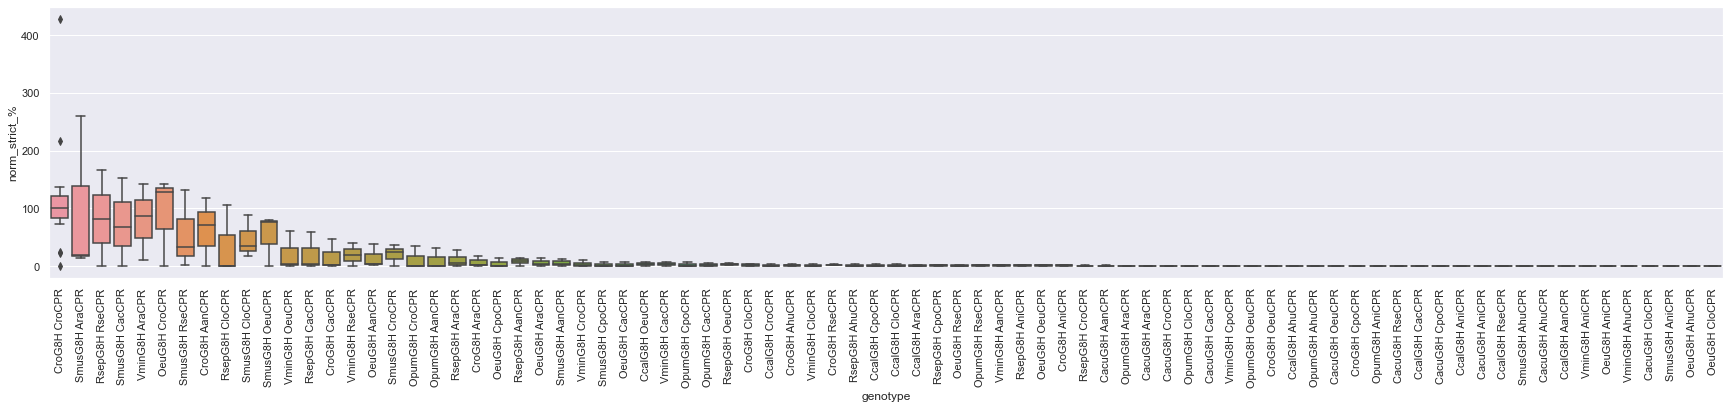

In [973]:
box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

This plot will take the same genotypes and make error bars. we are not interested in that. see below instesad. 

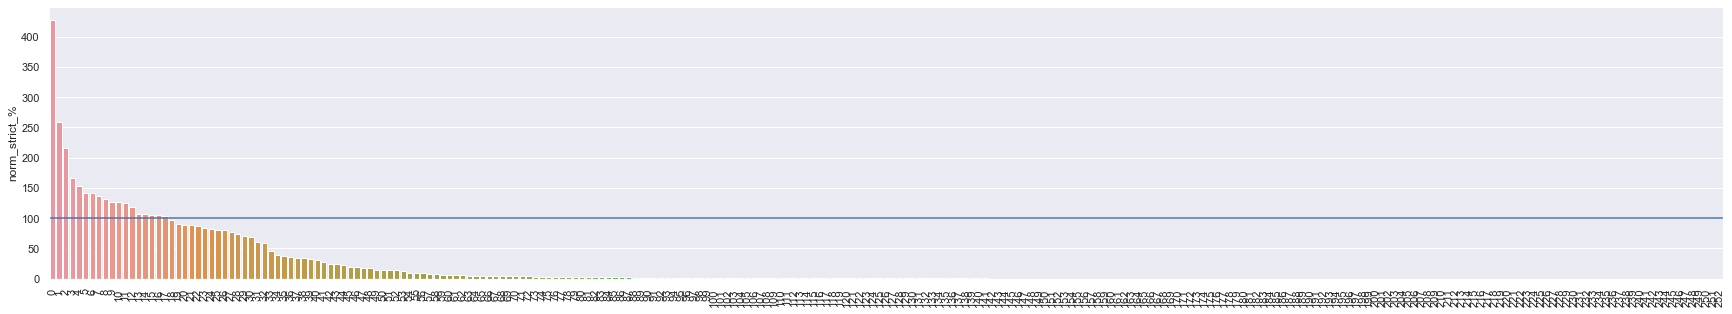

In [974]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

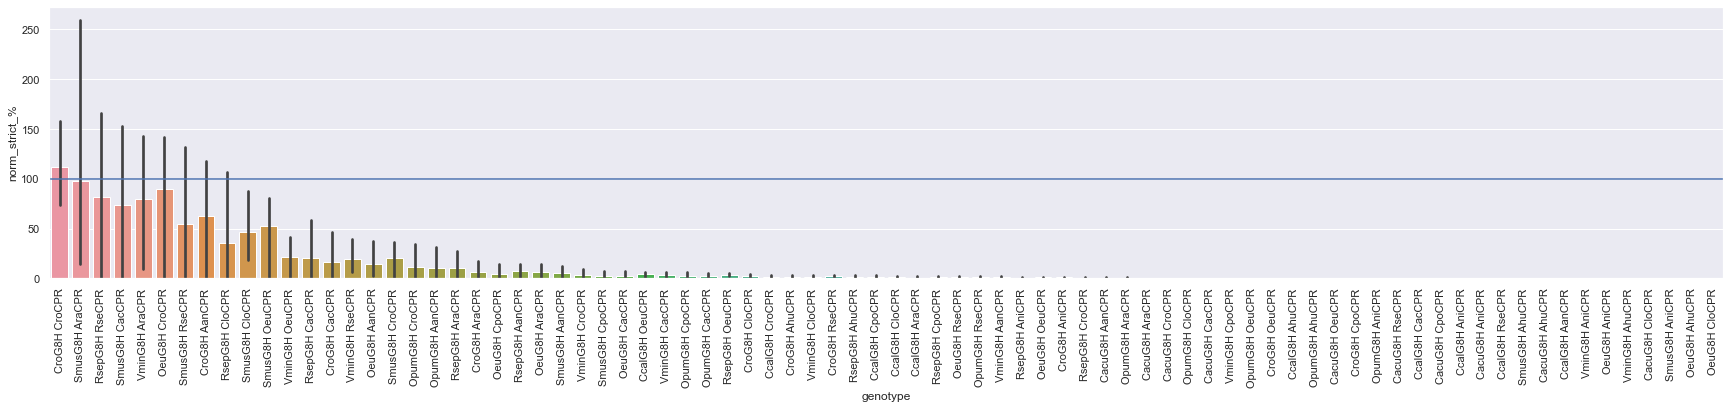

In [975]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

## 2.2 Genotyping

Purpose: Determine promoters from library strains to enable ML based sampling of library space

Methods:
DNA sequencing of assembled clusters. 


Genomic DNA was extracted from
overnight cultures using the LiOAc/SDS method adapted to a 96-well microtiter
plate format. Each extract was used as a template in 2 PCR reactions spanning
the 2 integrated promoter gene pairs and amplifying from 2500 to 3200 bp. The PCR
products were validated using a LabChip GX II (Perkin Elmer) and sequenced
using PlateSeq PCR Kits (Eurofins) according to the manufacturer’s instructions.
From the LabChip results, a PCR reaction was considered as trusted if it showed a
strong band of the correct size; not trusted if it showed a strong band of the wrong
size, and as no information (NI) gained if it showed a weak or no band. 


From the
sequencing results, a sequencing reaction was considered as trusted if it showed an
unambiguous sequence of the expected length (i.e., only limited by length of PCR
fragment, stretches of the same nucleotide in the promoter or of ~1 kb limit of
sanger sequencing reactions), not trusted if it showed an unambiguous sequence of
the expected length with an assembly error, and NI gained if there were no or bad
sequence results. If one or more sequencing results from the same strain showed
double peaks in the promoter region the strain was considered as a double
population. Finally, the promoter was noted as a failed assembly if either LabChip
and or sequencing results were considered not trusted, as NI if the sequencing
result was NI and else as the promoter predicted by pairwise alignment between
sequencing results and promoter sequence.

## 2.3 Sequencing

### Submission


[Documents folder](ConStrain_on_google_colab/Data/raw/10_Sanger_results/Sanger/Submission/eurofins_upload_template_plateseq.xlsx)


Eurofins     | SDP_ID | cassette
------------ | ------ | --------
PCR_00020195 | yp49   | g8h
PCR_00020204 | yp50   | g8h
PCR_00020205 | yp51   | g8h
PCR_00020206 | yp49   | cpr
PCR_00020207 | yp50   | cpr
PCR_00020208 | yp51   | cpr

In plateseq kits well h12 is reserved for quality control.
In all 6 plates yp49-51 for g8h & cpr well h12 contains medium control which do not need to be sequenced. Thus no need to rearrange samples.

### Download and movement of files to correct folders 
[Eurofins Results](https://eurofinsgenomics.eu/pages)

In [976]:
path = 'ConStrain_on_google_colab/Data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['ab1_second_round',
 'PlateReport_yp51_cpr.xls',
 '.DS_Store',
 'Sanger',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'PlateReport_yp54_cpr_Run1.xlsx',
 'ab1',
 'PlateReport_yp53_g8h_Run1.xlsx',
 'PlateReport_yp54_g8h_Run1.xlsx',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp53_cpr_Run1.xlsx',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [977]:
yp49_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_cpr.xls')
yp49_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_g8h.xls')
yp50_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_cpr.xls')
yp50_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_g8h.xls')
yp51_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_cpr.xls')
yp51_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_g8h.xls')

# list of all the dataframes
sequencing_plates = [yp49_cpr, yp49_g8h, yp50_cpr, yp50_g8h, yp51_cpr, yp51_g8h]

In [978]:
from constrain.test.genotyping import slicing_and_naming_seq_plates, plat_seq_data_wrangler, plate_AvgQual, split_df_names, concatenating_list_of_dfs

In [979]:
len(sequencing_plates)

6

### Data wrangling of plateSeq2 excel files

In [980]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

#merged_with_genotyping
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A1
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C1
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D1
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E1
12,6,yp49_cpr_F1_pad_cpr_fw,57.00,1246,21.0,1097.0,1075,yp49,F1
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [981]:
## Adding a zero to all the numers before 10
wells = []
for index, row in all_data_frames.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
        wells.append(row['well'])
    else: 
        wells.append(row['well'])
        
        
all_data_frames['well'] = wells
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A01
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C01
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D01
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E01
12,6,yp49_cpr_F1_pad_cpr_fw,57.00,1246,21.0,1097.0,1075,yp49,F01
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [982]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
concating_all_plates_with_bad_reads = concating_all_plates_with_bad_reads.replace('n.a.', np.NaN)
concating_all_plates_with_bad_reads = split_df_names([concating_all_plates_with_bad_reads])[0]
concating_all_plates_with_bad_reads

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A1
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115.0,144.0,28,yp49,B1
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C1
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D1
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E1
...,...,...,...,...,...,...,...,...,...
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
63,57,yp51_g8h_B12_pad_g8h_fw,18.65,1188,453.0,472.0,18,yp51,B12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12
65,59,yp51_g8h_D12_pad_g8h_fw,28.14,1213,534.0,602.0,67,yp51,D12


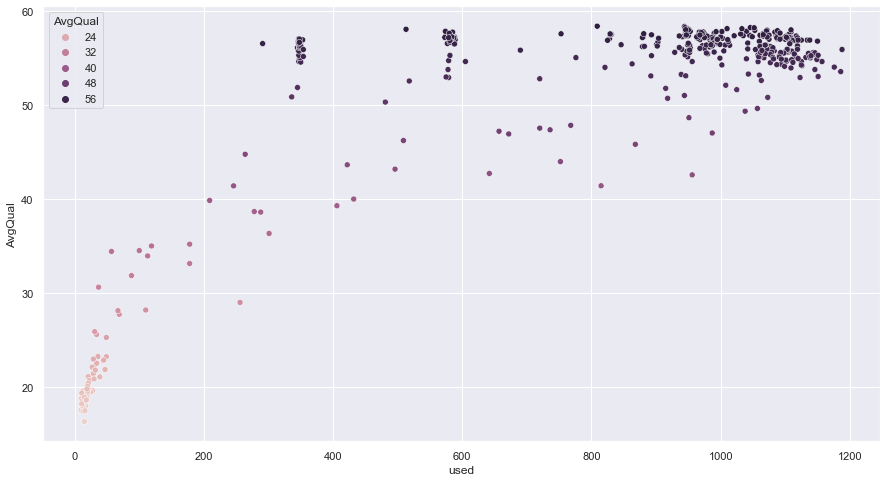

In [983]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

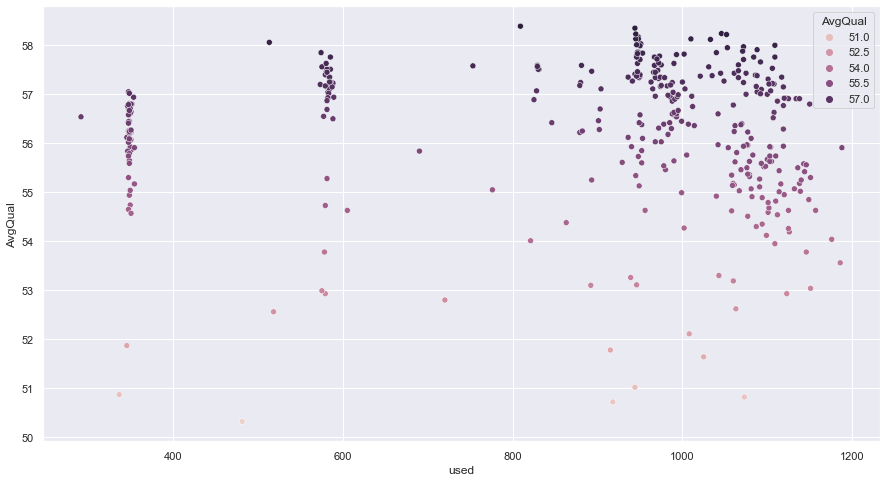

In [984]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Manual ab1 and promoter check 

### Detailed check of assemblies
- Manuel filtering. trusted / not_trusted ab1. 
- For certains strains multiple ab1 sequences get ambiguous only in promoters -> double population
- ab1 sequences quality drops preliminary due to stretches of same nucleotides in certain promoters  -> trusted even though small seq alignment 
- Low quality ab1 -> not_trusted


In [985]:
manual_checked = pd.read_excel('ConStrain_on_google_colab/Data/Sanger_seq_files/sequence_check2.xlsx')
manual_checked.head(10)

,plate,well,position,inf_promoter,ab1,ab1_comment,gel,gel_comment,if a larger part of the gene was not aligned due to N's,second alignment,Keep,Info
0,yp49,A01,2,5.0,good,good,good,good,NaN,NaN,True,"""-"" = empty"
1,yp49,A01,1,2.0,good,good,good,good,NaN,NaN,True,bad = not ambigous but does not align with pro...
2,yp49,A02,2,8.0,good,good,good,weak,NaN,NaN,True,bad = not ambigous but does not align with pro...
3,yp49,A02,1,3.0,good,good,good,good,NaN,NaN,True,NaN
4,yp49,A03,2,8.0,good,good,good,good,NaN,NaN,True,NaN
5,yp49,A03,1,3.0,good,good,good,good,NaN,NaN,True,NaN
6,yp49,A04,2,8.0,good,good,no_information,no_information,NaN,NaN,True,NaN
7,yp49,A04,1,3.0,good,good,good,good,NaN,NaN,True,NaN
8,yp49,A05,2,NaN,no_information,no_information,no_information,no_information,NaN,NaN,False,NaN
9,yp49,A05,1,3.0,good,good,good,good,NaN,NaN,True,NaN


Lets parse through the file and add the sequences to the all_sequences dataframe 

In [986]:
df_filterd_keep = manual_checked[manual_checked['Keep'] == True]

In [1001]:
# making Sample-name from the information above
#yp49_cpr_A1_pad_cpr_fw	

sample_names = []
for index, row in df_filterd_keep.iterrows():
    if row['position'] == 1:
        name = 'g8h'
    if row['position'] == 2:
        name = 'cpr'
    
    # Getting the right nomeclature
    if row['well'][1] == '0': 
        well = row['well'][0]+row['well'][2]  
    else: 
        well = row['well']

    sample_name = f"{row['plate']}_{name}_{well}_pad_{name}_fw"
    
    sample_names.append(sample_name)
    
df_filterd_keep['Sample-Name'] = sample_names


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_43343/3737357831.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd_keep['Sample-Name'] = sample_names


In [1049]:
df_filterd_keep

,Sample-Name,inf_part_number
0,yp49_cpr_A1_pad_cpr_fw,5.0
1,yp49_g8h_A1_pad_g8h_fw,2.0
2,yp49_cpr_A2_pad_cpr_fw,8.0
3,yp49_g8h_A2_pad_g8h_fw,3.0
4,yp49_cpr_A3_pad_cpr_fw,8.0
5,yp49_g8h_A3_pad_g8h_fw,3.0
6,yp49_cpr_A4_pad_cpr_fw,8.0
7,yp49_g8h_A4_pad_g8h_fw,3.0
9,yp49_g8h_A5_pad_g8h_fw,3.0
10,yp49_cpr_A6_pad_cpr_fw,6.0


In [1003]:
# Sample-Name	inf_part_name	align_score	inf_part_number
df_filterd_keep = df_filterd_keep[['Sample-Name', 'inf_promoter']]
df_filterd_keep.columns = ['Sample-Name', 'inf_part_number']
df_filterd_keep.head()

,Sample-Name,inf_part_number
0,yp49_cpr_A1_pad_cpr_fw,5.0
1,yp49_g8h_A1_pad_g8h_fw,2.0
2,yp49_cpr_A2_pad_cpr_fw,8.0
3,yp49_g8h_A2_pad_g8h_fw,3.0
4,yp49_cpr_A3_pad_cpr_fw,8.0


## 2.4 Infering promoter to sample relationship

#### Primers used

In [1004]:
from Bio import SeqIO

In [1005]:
from constrain.lims.csv_database import get_dna_from_box_name
get_dna_from_box_name

<function constrain.lims.csv_database.get_dna_from_box_name(name: str, database_name: str, database_path='../data/csv_database/', genbank_files_path='../data/genbank_files/', genbank=False) -> Bio.SeqRecord.SeqRecord>

In [1006]:
pad_pG8H_fw = get_dna_from_box_name('pad_pG8H_fw', 'primer_box', database_path = 'ConStrain_on_google_colab/Data/csv_database/')
pad_pCPR_fw = get_dna_from_box_name('pad_pCPR_fw', 'primer_box', database_path = 'ConStrain_on_google_colab/Data/csv_database/')


In [1007]:
primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

[SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='10148.0', name='pad_pG8H_fw', description='Stock of primers for G8H-CPR library ', dbxrefs=[]),
 SeqRecord(seq=Seq('GGCGTATGGACCTGTCT'), id='10144.0', name='pad_pCPR_fw', description='Stock of primers for G8H-CPR library ', dbxrefs=[])]

#### Promoters to be aligned

In [1008]:
pG8H_template_names = ['pCYC1','pENO2','pPCK1','pRPL15B']
pCPR_template_names = ['pCCW12','pMLS1','pTPI1','pURE2']

In [1009]:
path = 'ConStrain_on_google_colab/Data/csv_database/'
genbank_path = 'ConStrain_on_google_colab/Data/genbank_files/'


pG8H_sites =[get_dna_from_box_name(name, 'ds_dna_box', database_path = path,genbank = True, genbank_files_path = genbank_path) for name in pG8H_template_names]  
pCPR_sites =[get_dna_from_box_name(name, 'ds_dna_box', database_path = path, genbank = True, genbank_files_path = genbank_path) for name in pCPR_template_names]  


In [1010]:
templates = pCPR_sites+pG8H_sites

In [1011]:
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='10037', name='pCCW12', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='10038', name='pMLS1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='10039', name='pTPI1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='10040', name='pURE2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='10033', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='10034', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='10035', name='pPCK1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTG

#### ab1 reads to be analysed

In [1074]:
path = 'ConStrain_on_google_colab/Data/raw/10_Sanger_results/ab1/'
files = os.listdir(path)
print(len(files))
reads = []
for read in files:
    if read.endswith('ab1'): 
        reads.append(SeqIO.read(path+read, 'abi'))


501


In [1013]:
reads[12]

SeqRecord(seq=Seq('NNNNNNNNNNNGTANTGANNGGCTACCAAAAACGATAATCTCAACTGTAAACAG...NAA'), id='A-352518_F7', name='yp50_cpr_F7_pad_cpr_fw', description='', dbxrefs=[])

### 2.5 Aligning promoters to reads - infer promoter alignment

In [1014]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='10037', name='pCCW12', description=5, dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='10038', name='pMLS1', description=7, dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='10039', name='pTPI1', description=6, dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='10040', name='pURE2', description=8, dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='10033', name='pCYC1', description=1, dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='10034', name='pENO2', description=2, dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='10035', name='pPCK1', description=3, dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTGCTGGCCA

In [1015]:
# lets limit the alingment to only reads that are of proper quality
# all_data_frames
sample_names = df_filterd_keep['Sample-Name'].tolist()
print(len(sample_names))

good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
            
            
len(good_samples)

381


381

In [1016]:
from constrain.test.genotyping import pairwise_alignment_of_templates

In [1017]:
len(templates)

8

### 2.6 Aligning the reads to the templates

In [358]:
%%time

df_alignment = pairwise_alignment_of_templates(good_samples,templates, primers_for_seq)

df_alignment

CPU times: user 14min 22s, sys: 2.36 s, total: 14min 24s
Wall time: 14min 26s


,Sample-Name,inf_part_name,align_score,inf_part_number
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7
...,...,...,...,...
376,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8
377,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7
378,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
379,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2


In [1018]:
col_list =  list(df_alignment["align_score"])
print(col_list)

[751.0, 973.0, 932.0, 964.0, 973.0, 509.0, 966.0, 892.0, 968.0, 970.0, 518.0, 951.0, 525.0, 951.0, 503.0, 967.0, 859.0, 504.0, 968.0, 955.0, 966.0, 526.0, 972.0, 969.0, 970.0, 954.0, 969.0, 539.0, 959.0, 972.0, 972.0, 466.0, 949.0, 940.0, 444.0, 954.0, 968.0, 957.0, 756.0, 518.0, 679.0, 968.0, 933.0, 955.0, 544.0, 836.0, 955.0, 955.0, 870.0, 968.0, 856.0, 500.0, 501.0, 974.0, 912.0, 866.0, 793.0, 777.0, 785.0, 969.0, 308.0, 948.0, 969.0, 967.0, 950.0, 936.0, 955.0, 809.0, 970.0, 948.0, 532.0, 969.0, 680.0, 531.0, 838.0, 971.0, 967.0, 955.0, 948.0, 973.0, 527.0, 962.0, 955.0, 954.0, 961.0, 969.0, 918.0, 518.0, 751.0, 956.0, 951.0, 748.0, 971.0, 848.0, 969.0, 907.0, 831.0, 970.0, 970.0, 977.0, 971.0, 970.0, 954.0, 959.0, 949.0, 964.0, 953.0, 850.0, 969.0, 971.0, 516.0, 972.0, 956.0, 969.0, 531.0, 964.0, 936.0, 793.0, 959.0, 955.0, 518.0, 950.0, 529.0, 953.0, 964.0, 926.0, 734.0, 949.0, 973.0, 968.0, 972.0, 972.0, 485.0, 955.0, 810.0, 974.0, 794.0, 951.0, 973.0, 512.0, 964.0, 748.0, 954.0

In [1019]:
minvalue = df_alignment['align_score'].min()
minvalue

308.0

In [1020]:
df_align_sort = df_alignment.sort_values(['Sample-Name'])
df_align_sort.tail(10)

,Sample-Name,inf_part_name,align_score,inf_part_number,position
25,yp51_g8h_D9_pad_g8h_fw,pRPL15B,954.0,4,1
68,yp51_g8h_E11_pad_g8h_fw,pPCK1,970.0,3,1
170,yp51_g8h_E12_pad_g8h_fw,pCYC1,509.0,1,1
196,yp51_g8h_E1_pad_g8h_fw,pENO2,943.0,2,1
87,yp51_g8h_E2_pad_g8h_fw,pCYC1,518.0,1,1
39,yp51_g8h_E4_pad_g8h_fw,pCYC1,518.0,1,1
55,yp51_g8h_E5_pad_g8h_fw,pPCK1,866.0,3,1
132,yp51_g8h_E7_pad_g8h_fw,pCYC1,485.0,1,1
127,yp51_g8h_E8_pad_g8h_fw,pRPL15B,949.0,4,1
195,yp51_g8h_E9_pad_g8h_fw,pCYC1,521.0,1,1


In [1021]:
df_alignment['position'] = ''
position = []
for index, row in df_alignment.iterrows():
    split = str(row['Sample-Name'].split("_")[1])
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)

df_alignment['position'] = position
df_alignment

,Sample-Name,inf_part_name,align_score,inf_part_number,position
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5,2
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7,2
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7,2
...,...,...,...,...,...
376,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8,2
377,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7,2
378,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6,2
379,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


grouping the positions

In [1022]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

g8h_df

,Sample-Name,inf_part_name,align_score,inf_part_number,position
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
5,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1,1
6,yp49_g8h_C2_pad_g8h_fw,pPCK1,966.0,3,1
10,yp49_g8h_G12_pad_g8h_fw,pCYC1,518.0,1,1
...,...,...,...,...,...
373,yp51_g8h_A6_pad_g8h_fw,pCYC1,503.0,1,1
374,yp50_g8h_B7_pad_g8h_fw,pPCK1,961.0,3,1
375,yp50_g8h_C2_pad_g8h_fw,pRPL15B,955.0,4,1
379,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


In [1023]:
cpr_df

,Sample-Name,inf_part_name,align_score,inf_part_number,position
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7,2
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7,2
7,yp50_cpr_F7_pad_cpr_fw,pCCW12,892.0,5,2
8,yp50_cpr_G2_pad_cpr_fw,pURE2,968.0,8,2
...,...,...,...,...,...
371,yp49_cpr_F7_pad_cpr_fw,pURE2,973.0,8,2
372,yp49_cpr_G12_pad_cpr_fw,pMLS1,966.0,7,2
376,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8,2
377,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7,2


In [1024]:
218+163

381

In [1025]:
# lets merge the quality dataframe
# all_data_frames
infered_promoters_df = pd.merge(concating_all_plates_with_bad_reads, df_alignment, left_on=['Sample-Name'], right_on = ['Sample-Name'])

In [1048]:
infered_promoters_df

,plate,well,inf_part_number,position
0,yp49,A01,5,2
1,yp49,C01,5,2
2,yp49,D01,7,2
3,yp49,E01,5,2
4,yp49,F01,6,2
5,yp49,G01,7,2
6,yp49,H01,8,2
7,yp49,A02,8,2
8,yp49,B02,8,2
9,yp49,C02,8,2


#### Comparing to the manually currated dataframe

In [1028]:
indexes = []
new_inf_part = []
# manually curated
for index, row in df_filterd_keep.iterrows():
    
    # best pairwise alignment
    for index1, row1 in infered_promoters_df.iterrows():
        if row['Sample-Name'] == row1['Sample-Name']:
            if int(row['inf_part_number']) != int(row1['inf_part_number']):
                print('Not matching', row['inf_part_number'] , row1['inf_part_number'] , row['Sample-Name'] , row1['Sample-Name'])
                
                indexes.append(index1)
                new_inf_part.append(int(row['inf_part_number']))
                ## changing it to the manually curated one
                #infered_promoters_df.loc[index1].at['inf_part_number'] = 2
                #print('No match', row['inf_part_number'] , row1['inf_part_number'])


Not matching 2.0 7 yp51_g8h_D12_pad_g8h_fw yp51_g8h_D12_pad_g8h_fw


In [1029]:
# changing that 
infered_promoters_df1 = infered_promoters_df.copy(deep=True)
infered_promoters_df1['inf_part_number'][indexes[0]] = 2

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_43343/3119800932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infered_promoters_df1['inf_part_number'][indexes[0]] = 2


In [1030]:
infered_promoters_df = infered_promoters_df1[["plate", "well", "inf_part_number", "position"]]
infered_promoters_df

,plate,well,inf_part_number,position
0,yp49,A1,5,2
1,yp49,C1,5,2
2,yp49,D1,7,2
3,yp49,E1,5,2
4,yp49,F1,6,2
...,...,...,...,...
376,yp51,E11,3,1
377,yp51,A12,4,1
378,yp51,C12,3,1
379,yp51,D12,2,1


In [1034]:
well_list = infered_promoters_df['well'].to_list()

new_well_list = []
for i in range(len(well_list)): 
    if len(well_list[i]) == 2:
        
        well = str(well_list[i][0:1])+'0'+str(well_list[i][1:2])
        new_well_list.append(well)
        well= ''
        
    else: 
        new_well_list.append(well_list[i])

infered_promoters_df['well'] = new_well_list
infered_promoters_df

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_43343/100930297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infered_promoters_df['well'] = new_well_list


,plate,well,inf_part_number,position
0,yp49,A01,5,2
1,yp49,C01,5,2
2,yp49,D01,7,2
3,yp49,E01,5,2
4,yp49,F01,6,2
...,...,...,...,...
376,yp51,E11,3,1
377,yp51,A12,4,1
378,yp51,C12,3,1
379,yp51,D12,2,1


In [1035]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_part_number"]]
cpr_df = cpr_df[["plate", "well", "inf_part_number"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
promoter_to_well

,plate,well,inf_promoter1,inf_promoter2
0,yp49,A01,2,5
1,yp49,C01,2,5
2,yp49,D01,4,7
3,yp49,E01,1,5
4,yp49,F01,3,6
...,...,...,...,...
147,yp51,E11,3,7
148,yp51,A12,4,7
149,yp51,C12,3,7
150,yp51,D12,2,7


In [1050]:
print(len(g8h_df))
print(len(cpr_df))

218
163


Sanity check - did we get the correct promoters in each well? 


In [1038]:
for index, row in promoter_to_well.iterrows():
    if int(row['inf_promoter1']) > 4:
        print('SOMTHING WRONG WITH G8H', row['plate'], row['well'], index,row['inf_promoter1'])
    if int(row['inf_promoter2']) < 5:
            print('SOMTHING WRONG WITH CPR', row['plate'], row['well'], index)
print('SUCCESSSSS')


SUCCESSSSS


### 2.7 Re-sequencing 

As shown above alot we lose alot of samples because many of the CPR samples did not meet the quality criteria. Therefore we re-sequenced some of the samples again. 

In [1071]:
re_sequenced = pd.read_excel('ConStrain_on_google_colab/Data/Sanger_seq_files/ab1_first_round_resequencing/Mix2Seq - EF0000042174.xls')

# we can filter out the samples we need by only using samples with well not NAN
re_sequenced = re_sequenced[re_sequenced['Well'].notna()]
re_sequenced.head()

,Box,Tube Code,Rack Position,Strain,Primer,Date submitted,Results,Comment,Sample,Well
33,EF0000042207,EF20047945,C10,HA-43_F09_Rsep Ara_3 yp50 F09,pad_pG8H_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp50,F09
34,EF0000042208,EF20047946,C11,HA-42_F05_Rsep Aan_2 yp50 F05,pad_pG8H_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp50,F05
35,EF0000042209,EF20047947,C12,HA-39_E07_Smus Oeu_1 yp50 E07,pad_pG8H_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp50,E07
36,EF0000042210,EF20047948,D1,HA-83_A08_Oeu Ara_2 yp51 A08,pad_pCPR_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp51,A08
37,EF0000042211,EF20047949,D2,HA-82_A06_Oeu Aan_3 yp51 A06,pad_pCPR_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp51,A06


Importing the ab1 files

In [1089]:
path = 'ConStrain_on_google_colab/Data/Sanger_seq_files/ab1_first_round_resequencing/'
files = os.listdir(path)
print(len(files))
reads_reseq = []
for read in files:
    if read.endswith('ab1'): 
        reads_reseq.append(SeqIO.read(path+read, 'abi'))
        
print(len(reads_reseq))

41
40


In [1095]:
reads_reseq[0]

SeqRecord(seq=Seq('CAACGTAGGGGGAAAGAAGGGCTTACCAAAAACGATAATCTCAACTGTAAACAG...AGG'), id='EF20047981', name='EF20047981_EF20047981', description='', dbxrefs=[])

In [1082]:
# cross-ref the tube-codes
tube_codes = list(re_sequenced['Tube Code'])

In [1100]:
# checking the reads match
i = 0
for name in reads_reseq: 
    if name.id not in tube_codes: 
        print(name.id)
    # the names for the reads are written like "id_id". we'll overwrite.
    name.name = name.id
i

0

In [1101]:
reads_reseq[0]

SeqRecord(seq=Seq('CAACGTAGGGGGAAAGAAGGGCTTACCAAAAACGATAATCTCAACTGTAAACAG...AGG'), id='EF20047981', name='EF20047981', description='', dbxrefs=[])

In [1102]:
%%time
df_alignment_reseq = pairwise_alignment_of_templates(reads_reseq,templates, primers_for_seq)

CPU times: user 2min 14s, sys: 562 ms, total: 2min 15s
Wall time: 2min 15s


In [1173]:
df_alignment_reseq.head()

,Sample-Name,inf_part_name,align_score,inf_part_number
0,EF20047981,pCCW12,908.0,5
1,EF20047978,pTPI1,953.0,6
2,EF20047987,pCCW12,799.0,5
3,EF20047958,pURE2,981.0,8
4,EF20047980,pURE2,968.0,8


In [1191]:
promoter_to_well_reseq = pd.merge( df_alignment_reseq,re_sequenced, left_on=['Sample-Name' ], right_on = ['Tube Code'])
promoter_to_well_reseq.head()

,Sample-Name,inf_part_name,align_score,inf_part_number,Box,Tube Code,Rack Position,Strain,Primer,Date submitted,Results,Comment,Sample,Well
0,EF20047981,pCCW12,908.0,5,EF0000042239,EF20047981,F6,HA-39_E08_Smus Oeu_2 yp50 E08,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,E08
1,EF20047978,pTPI1,953.0,6,EF0000042236,EF20047978,F3,HA-45_G03_Rsep Rse_3 yp50 G0,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,G0
2,EF20047987,pCCW12,799.0,5,EF0000042243,EF20047987,F10,HA-32_C12_Smus Aan_3 yp50 C12,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,C12
3,EF20047958,pURE2,981.0,8,EF0000042218,EF20047958,D9,HA-42_F04_Rsep Aan_1 yp50 F04,pad_pCPR_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp50,F04
4,EF20047980,pURE2,968.0,8,EF0000042238,EF20047980,F5,HA-42_F04_Rsep Aan_1 yp50 F04,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,F04


Getting the positions ie. g8h or cpr

In [1196]:
positions =list(promoter_to_well_reseq['Primer'])
positions_for_df = []
for position in positions: 
    if position == 'pad_pCPR_fw': 
        positions_for_df.append(2)
    if position == 'pad_pG8H_fw': 
        positions_for_df.append(1)
promoter_to_well_reseq['position'] = positions_for_df

In [1198]:
promoter_to_well_reseq.head()

,Sample-Name,inf_part_name,align_score,inf_part_number,Box,Tube Code,Rack Position,Strain,Primer,Date submitted,Results,Comment,Sample,Well,position
0,EF20047981,pCCW12,908.0,5,EF0000042239,EF20047981,F6,HA-39_E08_Smus Oeu_2 yp50 E08,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,E08,2
1,EF20047978,pTPI1,953.0,6,EF0000042236,EF20047978,F3,HA-45_G03_Rsep Rse_3 yp50 G0,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,G0,2
2,EF20047987,pCCW12,799.0,5,EF0000042243,EF20047987,F10,HA-32_C12_Smus Aan_3 yp50 C12,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,C12,2
3,EF20047958,pURE2,981.0,8,EF0000042218,EF20047958,D9,HA-42_F04_Rsep Aan_1 yp50 F04,pad_pCPR_fw,2021-08-20 00:00:00,NaN,ExoSAP,yp50,F04,2
4,EF20047980,pURE2,968.0,8,EF0000042238,EF20047980,F5,HA-42_F04_Rsep Aan_1 yp50 F04,pad_pCPR_fw,2021-08-20 00:00:00,NaN,Washed with ethanol,yp50,F04,2


In [1202]:
promoter_to_well_reseq_filtered = promoter_to_well_reseq[['Sample', 'Well', 'inf_part_number', 'position']]
promoter_to_well_reseq_filtered.columns = ['plate', 'well', 'inf_part_number', 'position']
promoter_to_well_reseq_filtered.head()

,plate,well,inf_part_number,position
0,yp50,E08,5,2
1,yp50,G0,6,2
2,yp50,C12,5,2
3,yp50,F04,8,2
4,yp50,F04,8,2


In [1207]:
# concatenating with our previous dataframe 
infered_promoters_df = pd.concat([infered_promoters_df,promoter_to_well_reseq_filtered])

infered_promoters_df.tail()
print(len(infered_promoters_df))

541


In [1210]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_part_number"]]
cpr_df = cpr_df[["plate", "well", "inf_part_number"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
print(len(promoter_to_well))
promoter_to_well.head()

296


,plate,well,inf_promoter1,inf_promoter2
0,yp49,A01,2,5
1,yp49,C01,2,5
2,yp49,D01,4,7
3,yp49,E01,1,5
4,yp49,F01,3,6


In [1220]:
promoter_to_well = promoter_to_well.drop_duplicates(ignore_index = True)
len(promoter_to_well)

171

# 3. Combine data


In [1221]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
len(promoter_genotype_relationship)

168

In [1222]:
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,strain,col_no,genotype,medium,norm_strict_%
0,yp49,A01,2,5,0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907
1,yp49,C01,2,5,22,210519_TMET517_044.xms,96WP1056_C01,0.0,0.000000,0.0,0.149626,853.179516,96WP1056,MIA-HA-59,1.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.456221
2,yp49,D01,4,7,34,210519_TMET517_057.xms,96WP1056_D01,0.0,0.000000,0.0,0.049042,746.480964,96WP1056,MIA-HA-63,1.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.149532
3,yp49,E01,1,5,46,210519_TMET517_083.xms,96WP1056_E01,0.0,0.000000,0.0,0.096246,766.625577,96WP1056,MIA-HA-67,1.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.293460
4,yp49,F01,3,6,58,210519_TMET517_096.xms,96WP1056_F01,0.0,1.350410,0.0,7.365141,621.345993,96WP1056,MIA-HA-71,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,22.456900
5,yp49,G01,2,7,70,210519_TMET517_109.xms,96WP1056_G01,0.0,0.000000,0.0,1.112404,722.117732,96WP1056,MIA-HA-75,1.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,3.391807
6,yp49,H01,3,8,82,210519_TMET517_122.xms,96WP1056_H01,0.0,0.000000,0.0,0.128271,706.526720,96WP1056,MIA-HA-79,1.0,CroG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.391110
7,yp49,A02,3,8,1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.229021
8,yp49,B02,2,8,11,210519_TMET517_032.xms,96WP1056_B02,0.0,0.000000,0.0,0.071350,1336.272488,96WP1056,MIA-HA-55,2.0,CacuG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.217551
9,yp49,C02,3,8,23,210519_TMET517_045.xms,96WP1056_C02,0.0,0.000000,0.0,0.047391,937.509949,96WP1056,MIA-HA-59,2.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.144498


In [1223]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno = str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype

In [1224]:
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,strain,col_no,genotype,medium,norm_strict_%,G8H,CPR
0,yp49,A01,2,5,0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907,1,1
1,yp49,C01,2,5,22,210519_TMET517_044.xms,96WP1056_C01,0.0,0.000000,0.0,0.149626,853.179516,96WP1056,MIA-HA-59,1.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.456221,1,9
2,yp49,D01,4,7,34,210519_TMET517_057.xms,96WP1056_D01,0.0,0.000000,0.0,0.049042,746.480964,96WP1056,MIA-HA-63,1.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.149532,2,3
3,yp49,E01,1,5,46,210519_TMET517_083.xms,96WP1056_E01,0.0,0.000000,0.0,0.096246,766.625577,96WP1056,MIA-HA-67,1.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.293460,2,7
4,yp49,F01,3,6,58,210519_TMET517_096.xms,96WP1056_F01,0.0,1.350410,0.0,7.365141,621.345993,96WP1056,MIA-HA-71,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,22.456900,3,1
5,yp49,G01,2,7,70,210519_TMET517_109.xms,96WP1056_G01,0.0,0.000000,0.0,1.112404,722.117732,96WP1056,MIA-HA-75,1.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,3.391807,3,5
6,yp49,H01,3,8,82,210519_TMET517_122.xms,96WP1056_H01,0.0,0.000000,0.0,0.128271,706.526720,96WP1056,MIA-HA-79,1.0,CroG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.391110,3,9
7,yp49,A02,3,8,1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.229021,1,1
8,yp49,B02,2,8,11,210519_TMET517_032.xms,96WP1056_B02,0.0,0.000000,0.0,0.071350,1336.272488,96WP1056,MIA-HA-55,2.0,CacuG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.217551,1,5
9,yp49,C02,3,8,23,210519_TMET517_045.xms,96WP1056_C02,0.0,0.000000,0.0,0.047391,937.509949,96WP1056,MIA-HA-59,2.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.144498,1,9


make new dataframe of promoters: 


plate


In [1225]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

,plate,well,G8H,inf_promoter1,inf_promoter2,CPR,Amt_uM_Strictosidine,norm_strict_%
0,yp49,A01,1,2,5,1,0.271199,0.826907
1,yp49,C01,1,2,5,9,0.149626,0.456221
2,yp49,D01,2,4,7,3,0.049042,0.149532
3,yp49,E01,2,1,5,7,0.096246,0.293460
4,yp49,F01,3,3,6,1,7.365141,22.456900
5,yp49,G01,3,2,7,5,1.112404,3.391807
6,yp49,H01,3,3,8,9,0.128271,0.391110
7,yp49,A02,1,3,8,1,0.075112,0.229021
8,yp49,B02,1,2,8,5,0.071350,0.217551
9,yp49,C02,1,3,8,9,0.047391,0.144498


In [1226]:
promoter_genotype_relationship.columns = ['plate', 'well', '0','1', '2', '3',  'Amt_uM_Strictosidine', 'Amt_norm']
promoter_genotype_relationship

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp49,A01,1,2,5,1,0.271199,0.826907
1,yp49,C01,1,2,5,9,0.149626,0.456221
2,yp49,D01,2,4,7,3,0.049042,0.149532
3,yp49,E01,2,1,5,7,0.096246,0.293460
4,yp49,F01,3,3,6,1,7.365141,22.456900
5,yp49,G01,3,2,7,5,1.112404,3.391807
6,yp49,H01,3,3,8,9,0.128271,0.391110
7,yp49,A02,1,3,8,1,0.075112,0.229021
8,yp49,B02,1,2,8,5,0.071350,0.217551
9,yp49,C02,1,3,8,9,0.047391,0.144498


In [1227]:
promoter_genotype_relationship['Line Name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_43343/674118274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship['Line Name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']


In [1228]:
promoter_genotype_relationship

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm,Line Name
0,yp49,A01,1,2,5,1,0.271199,0.826907,yp49_A01
1,yp49,C01,1,2,5,9,0.149626,0.456221,yp49_C01
2,yp49,D01,2,4,7,3,0.049042,0.149532,yp49_D01
3,yp49,E01,2,1,5,7,0.096246,0.293460,yp49_E01
4,yp49,F01,3,3,6,1,7.365141,22.456900,yp49_F01
5,yp49,G01,3,2,7,5,1.112404,3.391807,yp49_G01
6,yp49,H01,3,3,8,9,0.128271,0.391110,yp49_H01
7,yp49,A02,1,3,8,1,0.075112,0.229021,yp49_A02
8,yp49,B02,1,2,8,5,0.071350,0.217551,yp49_B02
9,yp49,C02,1,3,8,9,0.047391,0.144498,yp49_C02


Make the final dataframe and sorting by Line_name

In [1229]:
promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line Name', '0','1', '2', '3', 'Amt_norm']].sort_values('Line Name')

In [1230]:
promoter_genotype_relationship_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.826907
7,yp49_A02,1,3,8,1,0.229021
16,yp49_A04,1,3,8,2,0.172318
30,yp49_A06,1,2,6,2,0.963411
33,yp49_A07,1,1,5,3,0.834021
37,yp49_A08,1,1,8,3,0.190162
39,yp49_A09,1,3,7,3,0.000000
8,yp49_B02,1,2,8,5,0.217551
12,yp49_B03,1,1,8,5,0.000000
17,yp49_B04,1,1,5,6,0.000000


In [1231]:
promoter_genotype_relationship_for_ml.to_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_LL.csv', index=False)

In [1232]:
input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_LL.csv', index_col=None)
input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.826907
1,yp49_A02,1,3,8,1,0.229021
2,yp49_A04,1,3,8,2,0.172318
3,yp49_A06,1,2,6,2,0.963411
4,yp49_A07,1,1,5,3,0.834021
5,yp49_A08,1,1,8,3,0.190162
6,yp49_A09,1,3,7,3,0.000000
7,yp49_B02,1,2,8,5,0.217551
8,yp49_B03,1,1,8,5,0.000000
9,yp49_B04,1,1,5,6,0.000000


# 4. Plotting the results:

In [1233]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]

promoter_dict = {i+1:list_of_promoters[i]for i in range(len(list_of_promoters))}
promoter_dict

{1: 'pCYC1',
 2: 'pENO2',
 3: 'pPCK1',
 4: 'pRPL15B',
 5: 'pCCW12',
 6: 'pTPI1',
 7: 'pMLS1',
 8: 'pURE2'}

In [1234]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]

pg8h_list_of_index = ['pCYC1', 'pENO2']
pcpr_list_of_index = ['pCCW12', 'pTPI1'] 



g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0']-1)]
    cpr_name = cpr_list_of_index[int(row['3']-1)]
    
    # promoters
    pg8h_name =promoter_dict[row['1']]
    pcpr_name = promoter_dict[row['2']]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

input_for_ml['G8H'] = g8h_genotype
input_for_ml['CPR'] = cpr_genotype
input_for_ml['pG8H'] = pg8h_genotype
input_for_ml['pCPR'] = pcpr_genotype

In [1235]:
for_plotting_input_for_ml = input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']]
for_plotting_input_for_ml

,G8H,pG8H,pCPR,CPR
0,CacuG8H,pENO2,pCCW12,CroCPR
1,CacuG8H,pPCK1,pURE2,CroCPR
2,CacuG8H,pPCK1,pURE2,AanCPR
3,CacuG8H,pENO2,pTPI1,AanCPR
4,CacuG8H,pCYC1,pCCW12,AraCPR
5,CacuG8H,pCYC1,pURE2,AraCPR
6,CacuG8H,pPCK1,pMLS1,AraCPR
7,CacuG8H,pENO2,pURE2,RseCPR
8,CacuG8H,pCYC1,pURE2,RseCPR
9,CacuG8H,pCYC1,pCCW12,AhuCPR


In [1236]:
simple_plotting = for_plotting_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']]
simple_plotting

,G8H,pG8H,pCPR,CPR
0,CacuG8H,pENO2,pCCW12,CroCPR
1,CacuG8H,pPCK1,pURE2,CroCPR
2,CacuG8H,pPCK1,pURE2,AanCPR
3,CacuG8H,pENO2,pTPI1,AanCPR
4,CacuG8H,pCYC1,pCCW12,AraCPR
5,CacuG8H,pCYC1,pURE2,AraCPR
6,CacuG8H,pPCK1,pMLS1,AraCPR
7,CacuG8H,pENO2,pURE2,RseCPR
8,CacuG8H,pCYC1,pURE2,RseCPR
9,CacuG8H,pCYC1,pCCW12,AhuCPR


In [1237]:
g8h_counts = pd.DataFrame(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = pd.DataFrame(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = pd.DataFrame(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = pd.DataFrame(for_plotting_input_for_ml["CPR"].value_counts())

all_counts = pd.concat([g8h_counts,pg8h_counts,pcpr_counts, cpr_counts ])
all_counts

,G8H,pG8H,pCPR,CPR
VminG8H,23.0,NaN,NaN,NaN
SmusG8H,23.0,NaN,NaN,NaN
CroG8H,22.0,NaN,NaN,NaN
OeuG8H,21.0,NaN,NaN,NaN
CcalG8H,21.0,NaN,NaN,NaN
RsepG8H,20.0,NaN,NaN,NaN
CacuG8H,19.0,NaN,NaN,NaN
OpumG8H,19.0,NaN,NaN,NaN
pRPL15B,NaN,56.0,NaN,NaN
pPCK1,NaN,40.0,NaN,NaN


In [1238]:
cpr_counts

,CPR
AanCPR,20
AhuCPR,20
CacCPR,20
AraCPR,19
RseCPR,17
CroCPR,16
OeuCPR,16
CloCPR,16
CpoCPR,13
AniCPR,11


In [1239]:
g8h_counts = dict(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = dict(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = dict(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = dict(for_plotting_input_for_ml["CPR"].value_counts())

all_counts_as_list = [g8h_counts,pg8h_counts,pcpr_counts,cpr_counts]
all_counts_as_list

[{'VminG8H': 23,
  'SmusG8H': 23,
  'CroG8H': 22,
  'OeuG8H': 21,
  'CcalG8H': 21,
  'RsepG8H': 20,
  'CacuG8H': 19,
  'OpumG8H': 19},
 {'pRPL15B': 56, 'pPCK1': 40, 'pCYC1': 38, 'pENO2': 34},
 {'pURE2': 50, 'pCCW12': 43, 'pMLS1': 38, 'pTPI1': 37},
 {'AanCPR': 20,
  'AhuCPR': 20,
  'CacCPR': 20,
  'AraCPR': 19,
  'RseCPR': 17,
  'CroCPR': 16,
  'OeuCPR': 16,
  'CloCPR': 16,
  'CpoCPR': 13,
  'AniCPR': 11}]

In [1240]:
def counting_occurences(data_with_occurences:dict): 
    columns = []
    data = []
    for key,value in data_with_occurences.items(): 

        values = cpr_counts.values()
        total = sum(values)

        data.append(value/total)
        columns.append(key)
        
    return data, columns

In [1241]:
# Occurences
names_list = ['G8H', 'pG8H', 'pCPR', 'CPR']

dataframes = []
for i in range(len(all_counts_as_list)): 
    data, columns = counting_occurences(all_counts_as_list[i])

    dataframes.append(pd.DataFrame(data, columns=[names_list[i]], index=columns))

    print(data, columns)

[0.13690476190476192, 0.13690476190476192, 0.13095238095238096, 0.125, 0.125, 0.11904761904761904, 0.1130952380952381, 0.1130952380952381] ['VminG8H', 'SmusG8H', 'CroG8H', 'OeuG8H', 'CcalG8H', 'RsepG8H', 'CacuG8H', 'OpumG8H']
[0.3333333333333333, 0.23809523809523808, 0.2261904761904762, 0.20238095238095238] ['pRPL15B', 'pPCK1', 'pCYC1', 'pENO2']
[0.2976190476190476, 0.25595238095238093, 0.2261904761904762, 0.22023809523809523] ['pURE2', 'pCCW12', 'pMLS1', 'pTPI1']
[0.11904761904761904, 0.11904761904761904, 0.11904761904761904, 0.1130952380952381, 0.10119047619047619, 0.09523809523809523, 0.09523809523809523, 0.09523809523809523, 0.07738095238095238, 0.06547619047619048] ['AanCPR', 'AhuCPR', 'CacCPR', 'AraCPR', 'RseCPR', 'CroCPR', 'OeuCPR', 'CloCPR', 'CpoCPR', 'AniCPR']


In [1242]:
all_df_for_stacked_plot = pd.concat(dataframes)
all_df_for_stacked_plot = all_df_for_stacked_plot.T
all_df_for_stacked_plot

,VminG8H,SmusG8H,CroG8H,OeuG8H,CcalG8H,RsepG8H,CacuG8H,OpumG8H,pRPL15B,pPCK1,...,AanCPR,AhuCPR,CacCPR,AraCPR,RseCPR,CroCPR,OeuCPR,CloCPR,CpoCPR,AniCPR
G8H,0.136905,0.136905,0.130952,0.125,0.125,0.119048,0.113095,0.113095,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pG8H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.238095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pCPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.119048,0.119048,0.119048,0.113095,0.10119,0.095238,0.095238,0.095238,0.077381,0.065476


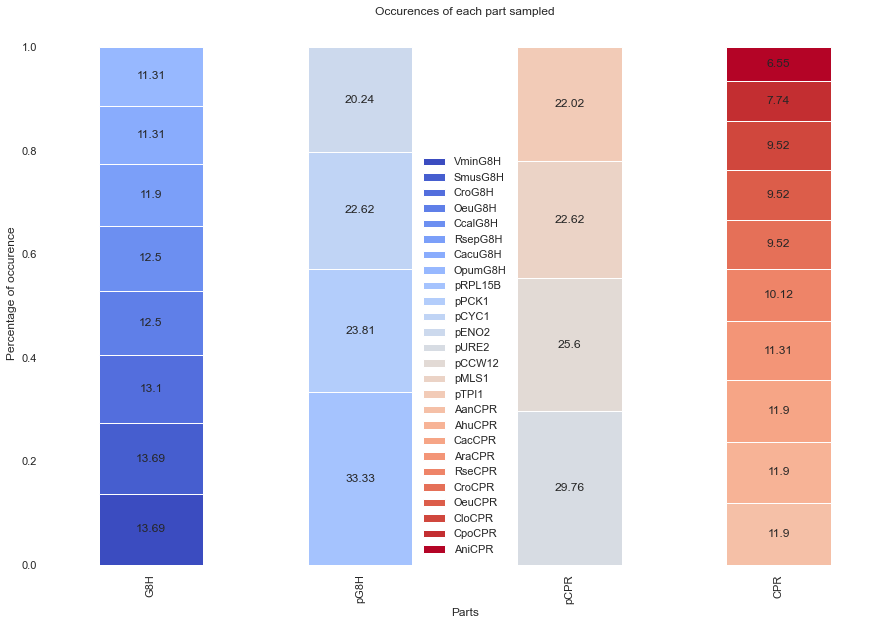

In [1243]:
import seaborn as sns


sns.set_theme( style='white')


ax = all_df_for_stacked_plot.plot( kind="bar",stacked = True,  figsize=(15, 10), cmap="coolwarm") # , cmap="coolwarm"
# Add Title and Labels
plt.title('Occurences of each part sampled')
plt.xlabel('Parts')
plt.ylabel('Percentage of occurence')


# removes the borders around the plot
sns.despine(bottom = True, left = True)
ax.legend(frameon=False) # around the legend


# adding laves to each box
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height()*100,2)  if v.get_height() > 0 else '' for v in c]
    
    # this one writes percent and 
    #labels = [[c.get_label(),round(v.get_height()*100,2)]  for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
